In [1]:
# Import the pacakges
# Read the data
# cat and num columns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path=r"C:\Users\omkar\OneDrive\Documents\Data science\Naresh IT\Naresh IT\Datafiles\\Visadataset.csv"
visa_df=pd.read_csv(file_path)
visa_df

cat_cols=visa_df.select_dtypes(include='object').columns
num_cols=visa_df.select_dtypes(exclude='object').columns
num_cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

**non-outliers data**

In [3]:
wage_data= visa_df['prevailing_wage']
q1=round(np.quantile(wage_data,0.25),2)
q2=round(np.quantile(wage_data,0.50),2)
q3=round(np.quantile(wage_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data>lb
con2=wage_data<ub
con3=con1&con2
non_outliers_data=visa_df[con3]
non_outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


**outliers_data**

In [4]:
wage_data= visa_df['prevailing_wage']
q1=round(np.quantile(wage_data,0.25),2)
q2=round(np.quantile(wage_data,0.50),2)
q3=round(np.quantile(wage_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con3=con1|con2
outliers_data=visa_df[con3]
outliers_data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


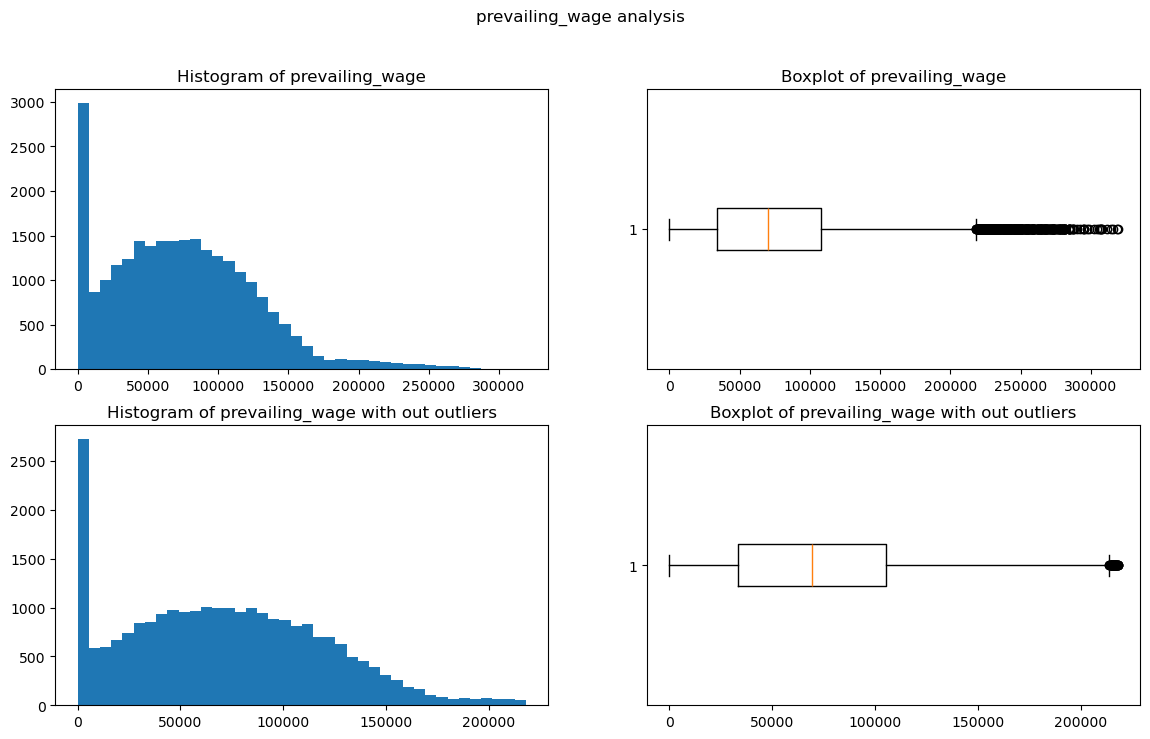

In [10]:
plt.figure(figsize=(14,8))
plt.suptitle('prevailing_wage analysis')
plt.subplot(2,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.title('Histogram of prevailing_wage')
plt.subplot(2,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.title('Boxplot of prevailing_wage')
plt.subplot(2,2,3).hist(non_outliers_data['prevailing_wage'],bins=40)
plt.title('Histogram of prevailing_wage with out outliers')
plt.subplot(2,2,4).boxplot(non_outliers_data['prevailing_wage'],vert=False)
plt.title('Boxplot of prevailing_wage with out outliers')
plt.show()

**How to deal the outliers**

**Method-1: Drop the outliers**

- if outliers has less than 2% of total data , we can drop the outliers

- drop the outliers is not a recommended approach

- if we drop the outliers other column values also drop

- we encounter a situation about to loss the data

- in above we developed a code for **non outliers data**

**Method-2: Fill with Median**

- We already know that outliers does not affect by median

- so it is a good approach fill the outliers with median

**Method-3: Cap the outliers**

- instead of fill the outliers with median , we can fill with q3 or q1 or max or min

In [ ]:
# step-1: calculate lb and ub it is already available
# step-2: calculate the median
# step-3: new data =[]
# step-4: iterate each value from wage data
# step-5:     if value <lb or value>ub
# step-6:         new_data.append(median)
# step-7:     else:
# step-8:         new_data.append(value)
# step-9: visa_df['prevailing_wage']=new_data

In [15]:
Q1=np.quantile(wage_data,0.25)
Q2=np.quantile(wage_data,0.50)
Q3=np.quantile(wage_data,0.75)
IQR=Q3-Q1
lb=Q1-(1.5*IQR)
ub=Q3+(1.5*IQR)
median=wage_data.median()
new_data=[]
for value in wage_data:
    if value<lb or value>ub:
        new_data.append(median)
    else:
        new_data.append(value)
visa_df['prevailing_wage']=new_data

In [16]:
np.max(visa_df['prevailing_wage'])

218094.61

Text(0.5, 1.0, 'Boxplot of prevailing_wage')

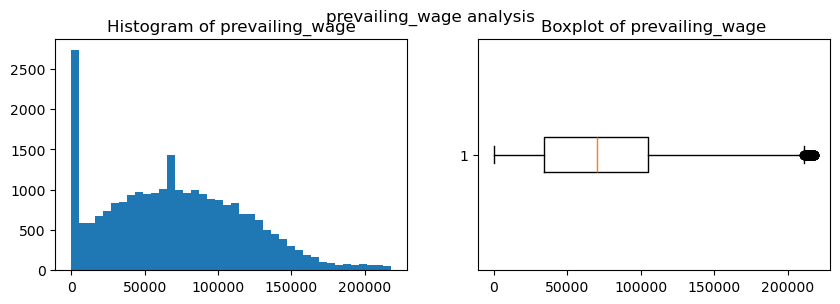

In [19]:
plt.figure(figsize=(10,3))
plt.suptitle('prevailing_wage analysis')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.title('Histogram of prevailing_wage')
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.title('Boxplot of prevailing_wage')

**np.where**

- np.where is a method useful when we can fill the values with one condition two outputs

- all the if-else statements we can do with np.where

- **syntax**: np.where(condition,True value,False value)

- it takes 3 arguments

    - Condition

    - True value: when the condition becomes True

    - False value: when the condition becomes False

In [20]:
dict1={'Marks':[100,200,300,400],
      'Sub':['DS','DE','CS','IOT']}
df=pd.DataFrame(dict1)
df

,Marks,Sub
0,100,DS
1,200,DE
2,300,CS
3,400,IOT


In [ ]:
# i want to replace the marks=1 which are having > 200
# marks
# 100
# 200
# 1
# 1

In [24]:
con=df['Marks']>200
true_value=1
false_value=df['Marks']
data=np.where(con,true_value,false_value)
df['Marks']=data
df

,Marks,Sub
0,100,DS
1,200,DE
2,1,CS
3,1,IOT


In [25]:
# Read the data again because we already overwrite
wage_data= visa_df['prevailing_wage']
q1=round(np.quantile(wage_data,0.25),2)
q2=round(np.quantile(wage_data,0.50),2)
q3=round(np.quantile(wage_data,0.75),2)
IQR=q3-q1
lb=q1-1.5*IQR
ub=q3+1.5*IQR
con1=wage_data<lb
con2=wage_data>ub
con=con1|con2
########################################################
new_data = np.where(con, q2, wage_data)
visa_df['prevailing_wage'] = new_data

Text(0.5, 1.0, 'Boxplot of prevailing_wage')

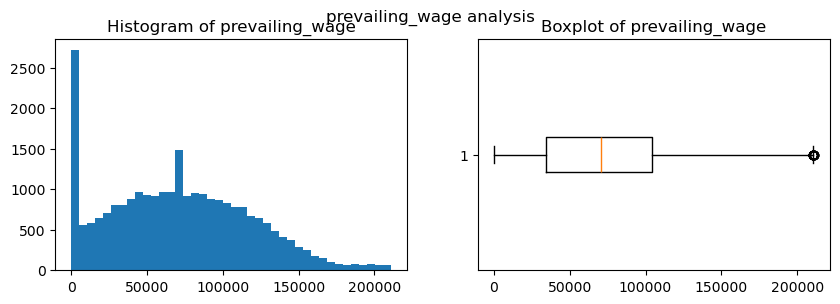

In [26]:
plt.figure(figsize=(10,3))
plt.suptitle('prevailing_wage analysis')
plt.subplot(1,2,1).hist(visa_df['prevailing_wage'],bins=40)
plt.title('Histogram of prevailing_wage')
plt.subplot(1,2,2).boxplot(visa_df['prevailing_wage'],vert=False)
plt.title('Boxplot of prevailing_wage')